In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data_Falcon9.csv')

In [3]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [4]:
df.isnull().sum()/df.count()*100

FlightNumber      0.0
Date              0.0
BoosterVersion    0.0
PayloadMass       0.0
Orbit             0.0
LaunchSite        0.0
Outcome           0.0
Flights           0.0
GridFins          0.0
Reused            0.0
Legs              0.0
Block             0.0
ReusedCount       0.0
Serial            0.0
Longitude         0.0
Latitude          0.0
Class             0.0
dtype: float64

In [5]:
df.LaunchSite.value_counts()

CCSFS SLC 40    99
KSC LC 39A      50
VAFB SLC 4E     28
Name: LaunchSite, dtype: int64

In [6]:
# Apply value_counts on Orbit column
df.Orbit.value_counts()

VLEO     56
GTO      34
ISS      32
LEO      17
PO       14
SSO      13
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
Name: Orbit, dtype: int64

In [8]:
df.Outcome.value_counts()

True - ASDS      114
None - None       23
True - RTLS       22
False - ASDS       8
True - Ocean       5
False - Ocean      2
None - ASDS        2
False - RTLS       1
Name: Outcome, dtype: int64

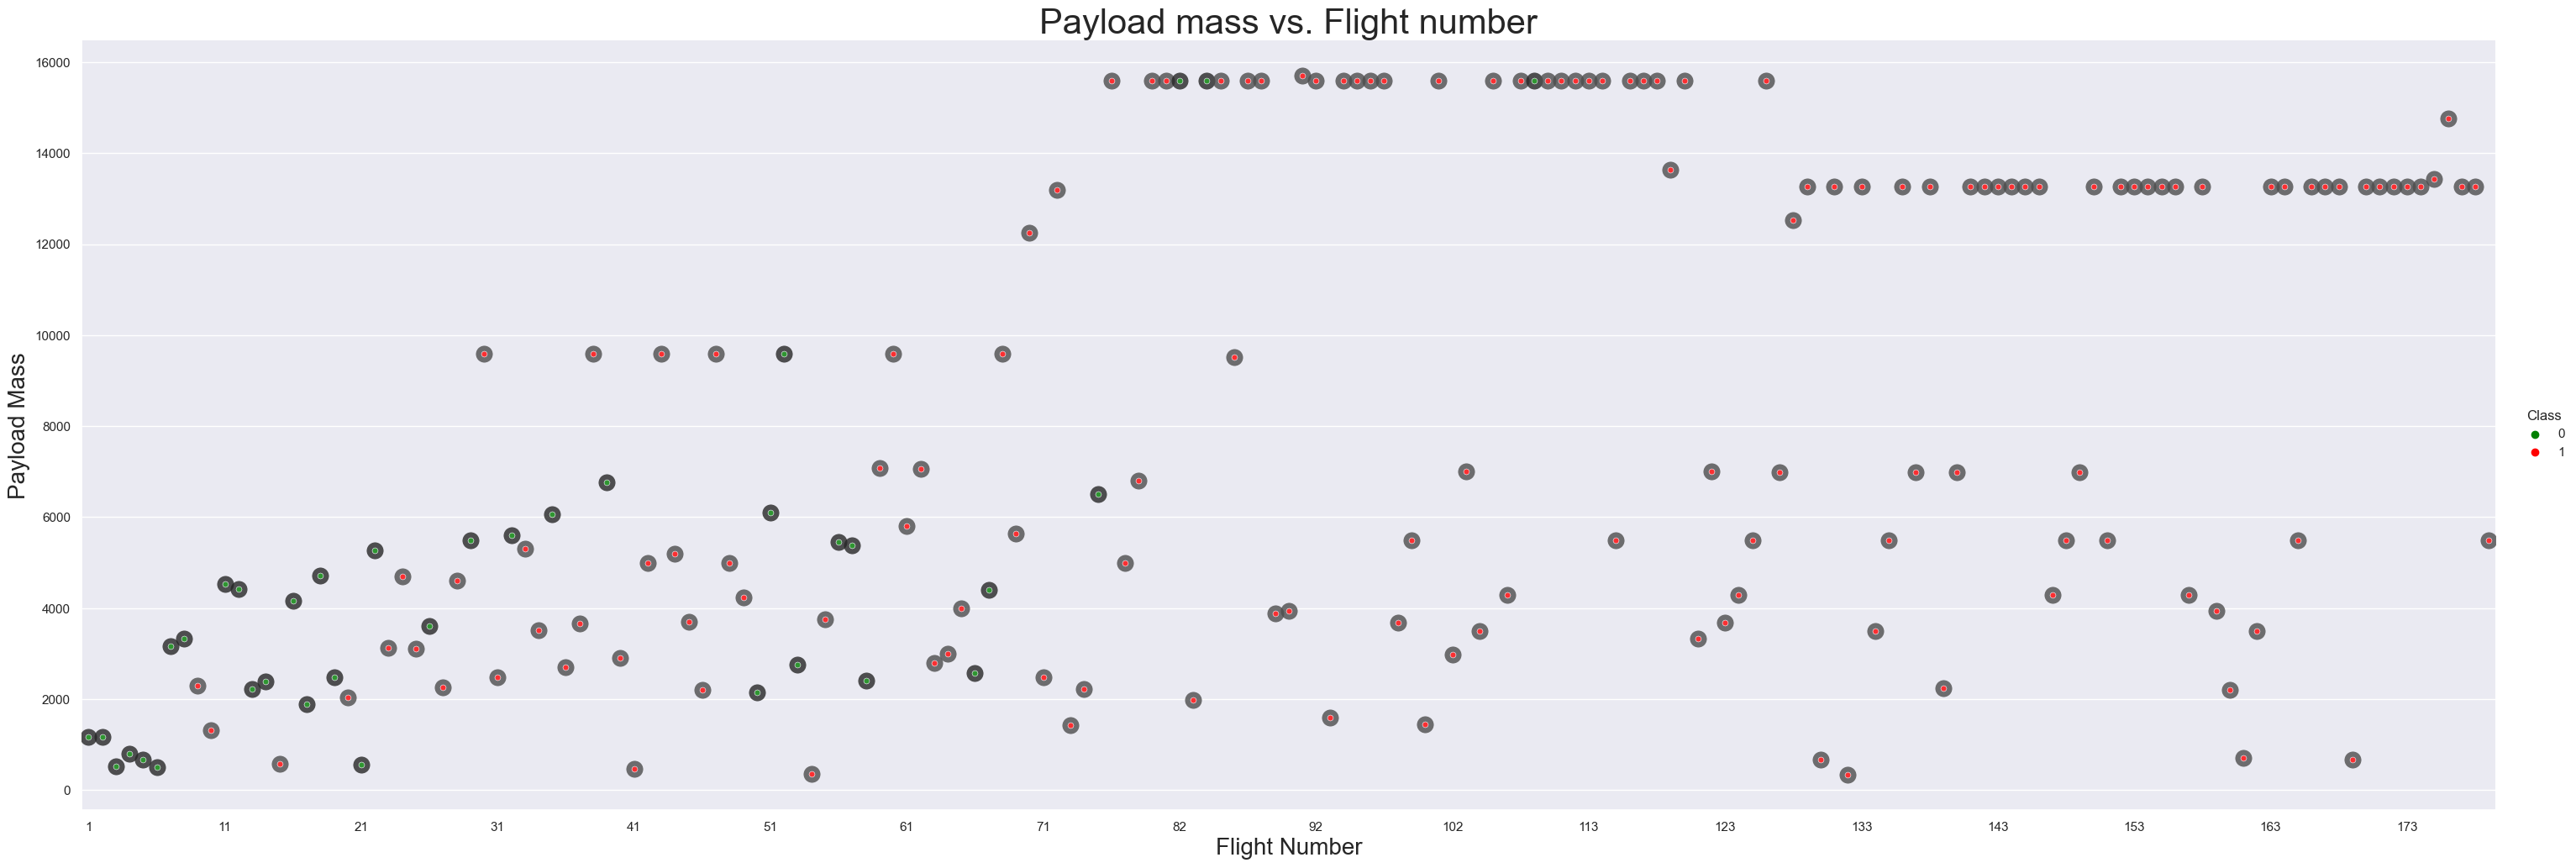

In [8]:
sns.set(font_scale = 1)
plot1 = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, s=20,
               alpha=0.8, linewidth=10, height=10, aspect=3,palette={0: "green", 1: "red"})
plt.title("Payload mass vs. Flight number",fontsize=30)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass",fontsize=20)
# Set xticks to display every 10th Flight Number
for ax in plot1.axes.flat:
    ax.set_xticks(ax.get_xticks()[::10])
plt.show()

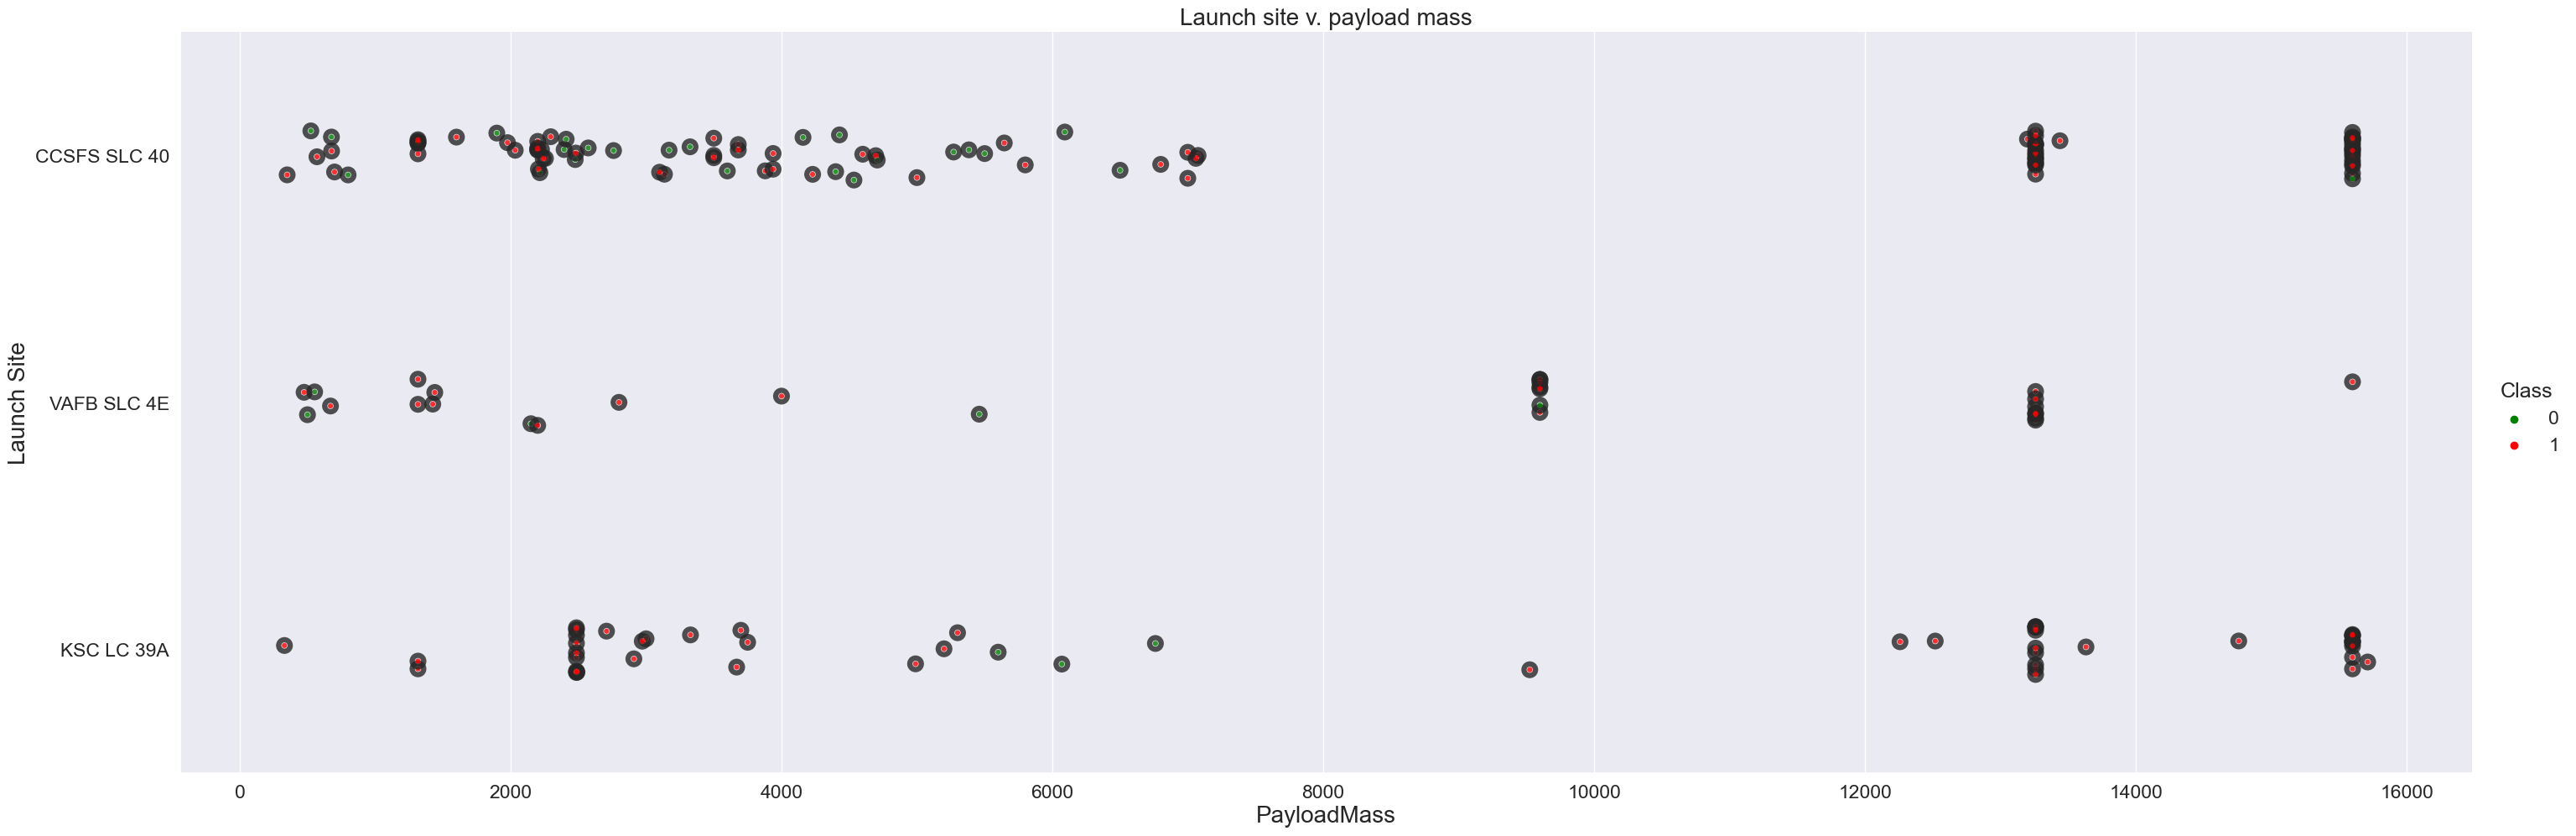

In [10]:
sns.set(font_scale = 1.5)
plot2 = sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, s=20,
               alpha=0.8, linewidth=10, height=10, aspect=3, palette={0: "green", 1: "red"})
plt.title("Launch site v. payload mass",fontsize=20)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
#for ax in plot2.axes.flat:
   # ax.set_xticks(ax.get_xticks()[::10])
plt.show()

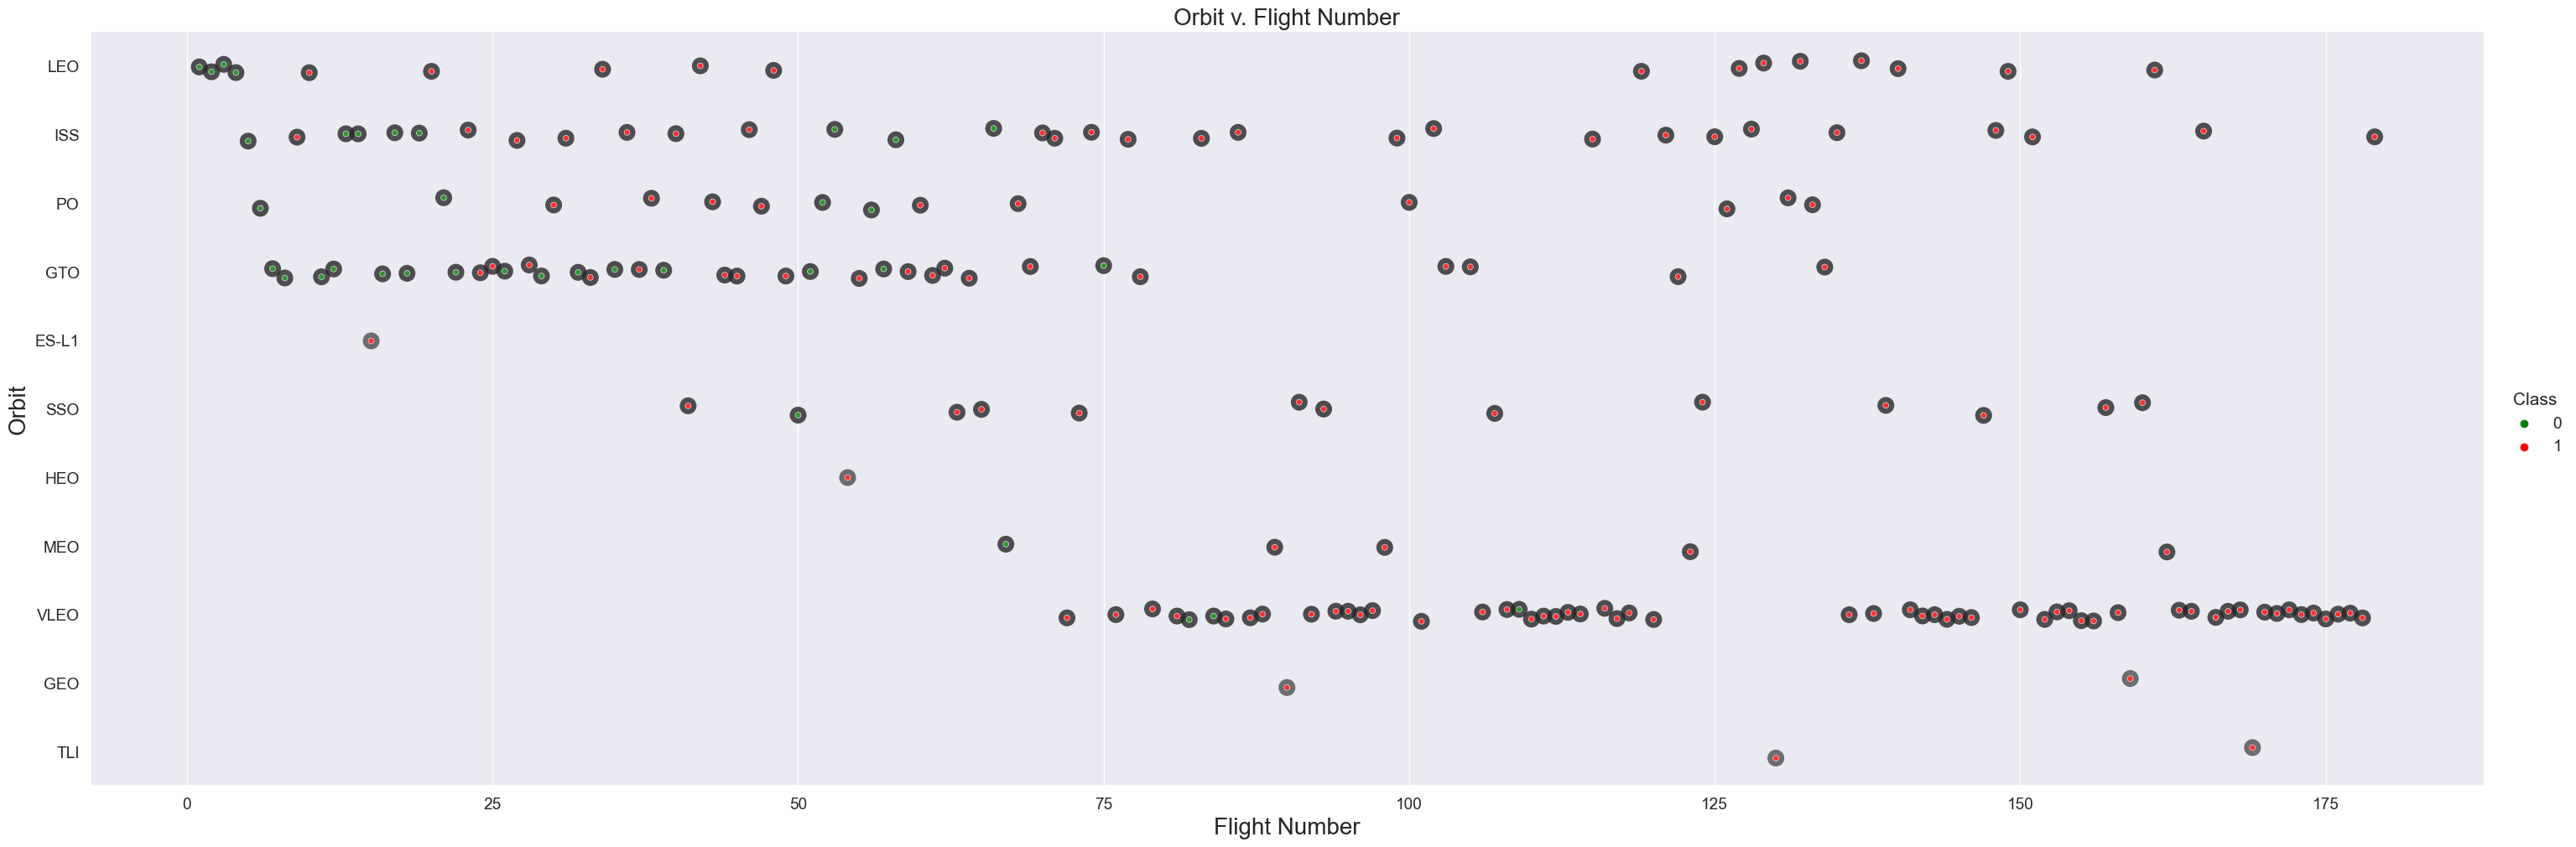

In [10]:
sns.set(font_scale = 1.25)
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, s=20,
               alpha=0.8, linewidth=10, height=10, aspect=3,palette={0: "green", 1: "red"})
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit v. Flight Number",fontsize=20)
plt.show()

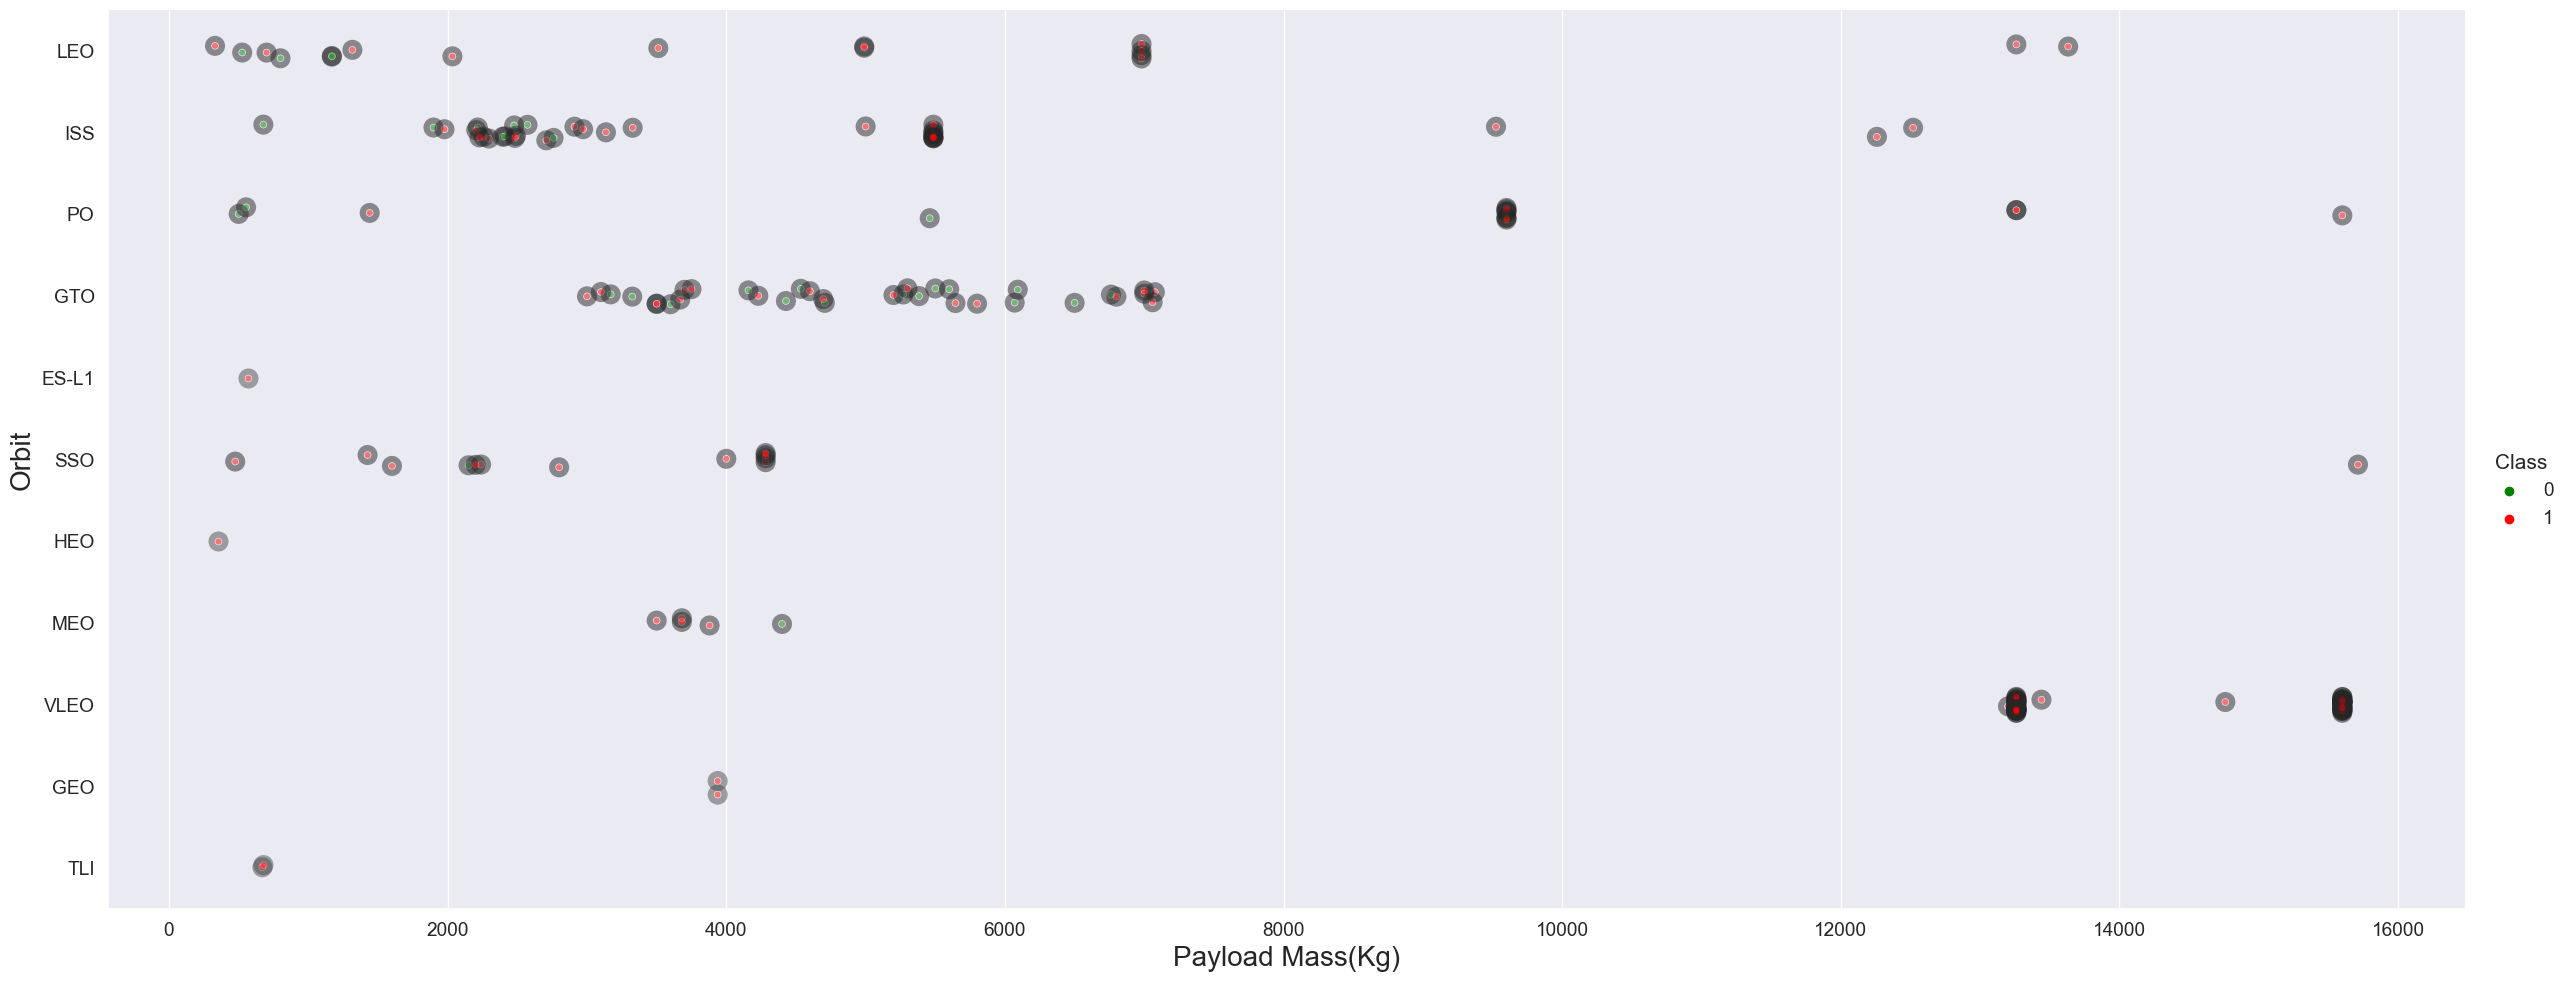

In [11]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.set(font_scale = 1.25)
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, s=20,
               alpha=0.5, linewidth=10, height=10, aspect=2.5,palette={0: "green", 1: "red"})
plt.xlabel("Payload Mass(Kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

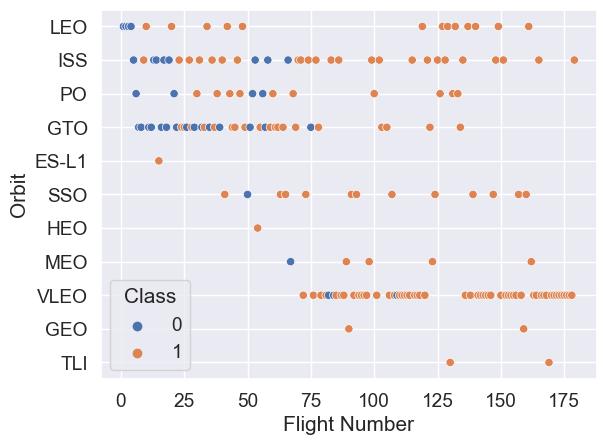

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x="FlightNumber", y="Orbit", data=df, hue="Class")
plt.xlabel("Flight Number")
plt.show()

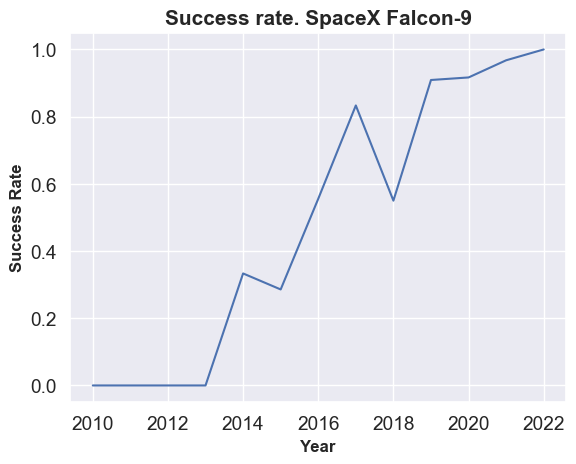

In [13]:
# Function to extract years from the date
df['Year'] = df['Date'].str.split('-').str.get(0).astype(int)

# Plot a line chart with x axis as the extracted year and y axis as the success rate
sns.lineplot(x=df['Year'].unique(), y=df.groupby(['Year'])['Class'].mean()) 

# Set labels and title
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Success Rate", fontsize=12, fontweight='bold')
plt.title("Success rate. SpaceX Falcon-9", fontsize=15, fontweight='bold')

# Show the plot
plt.show()

In [14]:
success_rate_by_orbit = df.groupby(["Orbit"]).mean()["Class"]
success_rate_by_orbit

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.558824
HEO      1.000000
ISS      0.750000
LEO      0.764706
MEO      0.800000
PO       0.714286
SSO      0.923077
TLI      1.000000
VLEO     0.946429
Name: Class, dtype: float64

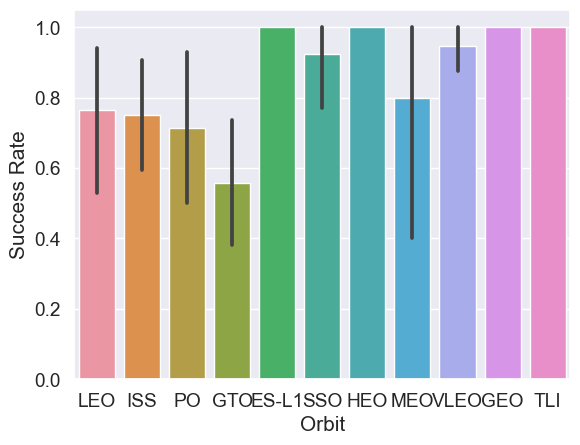

In [83]:
# HINT use groupby method on Orbit column and get the mean of Class column
sns.barplot(x="Orbit", y="Class", data=df)
plt.ylabel("Success Rate")
plt.show()

In [14]:
success_rate_by_Lunchsite = df.groupby(["LaunchSite"]).mean()["Class"]
success_rate_by_Lunchsite

LaunchSite
CCSFS SLC 40    0.727273
KSC LC 39A      0.920000
VAFB SLC 4E     0.821429
Name: Class, dtype: float64

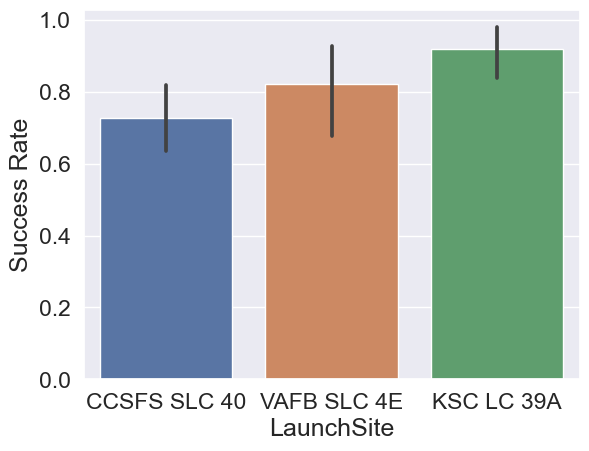

In [12]:
# HINT use groupby method on Orbit column and get the mean of Class column
sns.barplot(x="LaunchSite", y="Class", data=df)
plt.ylabel("Success Rate")
plt.show()